<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Face_Recognition_with_CV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
import cv2
import collections
import numpy as np
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

In [16]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/'
!kaggle datasets download -d olgabelitskaya/yale-face-database
os.makedirs('/content/data/', exist_ok=True)
os.rename('/content/yale-face-database.zip', '/content/data/yale-face-database.zip')
!unzip /content/data/yale-face-database.zip && rm /content/data/yale-face-database.zip
os.rename('/content/data/Readme.txt', '/content/Readme.txt')
os.rename('/content/data/.ipynb_checkpoints', '/content/.ipynb_checkpoints')

In [19]:
def date_loader(path):

  faces, ids = [], []
  for p in os.listdir(path):
    img = Image.open(os.path.join(path, p)).convert('L')
    faces.append(np.array(img, 'uint8'))
    id = int(p.split('.')[0].replace('subject', ''))
    ids.append(id)
  
  return faces, np.array(ids)

In [23]:
faces, labels = date_loader('/content/data/')

In [25]:
collections.Counter(labels)

Counter({15: 11,
         14: 11,
         5: 11,
         8: 11,
         9: 11,
         12: 11,
         3: 11,
         10: 11,
         11: 11,
         4: 11,
         6: 11,
         7: 11,
         2: 11,
         1: 11,
         13: 11})

In [35]:
#dataset is balanced, so lets split it to train/test

arr = [0]*16
test_x, train_x = [], []
test_y, train_y = [], []

for f, l in zip(faces, labels):
  if arr[l] < 1:
    arr[l]+= 1
    test_x.append(f)
    test_y.append(l)
  else:
    train_x.append(f)
    train_y.append(l)

In [37]:
lbph_clf = cv2.face.LBPHFaceRecognizer_create()
lbph_clf.train(np.array(train_x), np.array(train_y))
lbph_clf.write('libph_clf.yml')

In [39]:
lbph_clf = cv2.face.LBPHFaceRecognizer_create()
lbph_clf.read('libph_clf.yml')

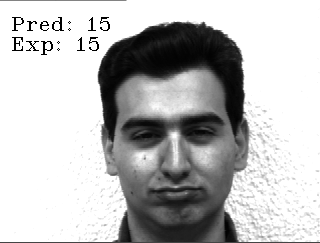

In [50]:
N=0
test = np.array(test_x[N])
pred = lbph_clf.predict(test)
cv2.putText(test, f'Pred: {pred[N]}', (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(test, f'Exp: {test_y[N]}', (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(test)